In [242]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 读入电影评分数据ratings.csv

In [243]:
# 读入数据
df = pd.read_csv('ratings.csv')

# 1. 筛选出 userId 重复出现 500 次的 userId 名单
user_count = df['userId'].value_counts()
user_500 = user_count[user_count > 500].index.tolist()

# 2. 筛选出 movieId 重复出现 1000 次的 movieId 名单
movie_count = df['movieId'].value_counts()
movie_1000 = movie_count[movie_count > 1000].index.tolist()

# 3. 筛选出同时满足 userId 和 movieId 出现次数要求的行
filtered_df = df[df['userId'].isin(user_500) & df['movieId'].isin(movie_1000)]

# 输出筛选后的结果
print("筛选后的数据：")
print(filtered_df)

筛选后的数据：
          userId  movieId  rating   timestamp
254            3        1     4.0  1439472215
255            3       29     4.5  1484754967
256            3       32     4.5  1439474635
257            3       50     5.0  1439474391
258            3      111     4.0  1484753849
...          ...      ...     ...         ...
24996934  162519     4718     3.0  1000946228
24996935  162519     4734     4.0  1000948027
24996938  162519     4855     5.0  1001884147
24996939  162519     4857     5.0  1001886067
24996940  162519     5060     5.0  1000948162

[7102973 rows x 4 columns]


In [244]:
# 输出筛选结果
print("\nuserId 重复出现 500 次以上的数量: "+str(len(user_500)))
print("\nmovieId 重复出现 1000 次以上的数量: "+str(len(movie_1000)))


userId 重复出现 500 次以上的数量: 9663

movieId 重复出现 1000 次以上的数量: 3790


#### 处理电影评分数据为 userId×movieId 的格式

In [245]:
# 将 filtered_df 转换为 userId 为行，movieId 为列，值为 rating 的 DataFrame
pivot_df = filtered_df.pivot(index='userId', columns='movieId', values='rating')
# 输出转换后的结果
print(pivot_df)

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
3           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
12          4.0     2.0     2.0     NaN     NaN     NaN     3.0     NaN   
72          NaN     2.0     NaN     NaN     NaN     4.0     4.0     NaN   
80          NaN     1.0     NaN     NaN     NaN     5.0     NaN     NaN   
120         5.0     NaN     NaN     NaN     NaN     NaN     4.0     NaN   
...         ...     ...     ...     ...     ...     ...     ...     ...   
162484      3.5     3.0     NaN     3.0     2.0     NaN     NaN     NaN   
162495      3.0     3.0     3.5     NaN     2.0     NaN     NaN     NaN   
162508      4.5     NaN     NaN     NaN     NaN     3.0     NaN     NaN   
162516      4.5     2.5     0.5     2.0     NaN     4.5     2.0     NaN   
162519      5.0     2.0     NaN     NaN     NaN     2.0     NaN     NaN   

movieId  9       10     

## 读入电影基本信息表movies.csv

In [246]:
# 读入 movies.csv 文件
movies = pd.read_csv('movies.csv')

# 获取 pivot_df 中的所有 movieId（即列索引）
movie_ids_in_ratings = pivot_df.columns

# 筛选出 movieId 在 pivot_df 中的电影数据
filtered_movies = movies[movies['movieId'].isin(movie_ids_in_ratings)]

# 查看筛选后的电影数据
print(filtered_movies)

       movieId                                     title  \
0            1                          Toy Story (1995)   
1            2                            Jumanji (1995)   
2            3                   Grumpier Old Men (1995)   
3            4                  Waiting to Exhale (1995)   
4            5        Father of the Bride Part II (1995)   
...        ...                                       ...   
55643   192389                              Venom (2018)   
55821   192803                  Bohemian Rhapsody (2018)   
56570   194448                         Green Book (2018)   
56890   195159  Spider-Man: Into the Spider-Verse (2018)   
59844   201773          Spider-Man: Far from Home (2019)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4             

## 以第一个电影（《玩具总动员》）为例，查看该电影评分的分布情况

In [247]:
filtered_movies.iloc[0]

movieId                                              1
title                                 Toy Story (1995)
genres     Adventure|Animation|Children|Comedy|Fantasy
Name: 0, dtype: object

In [248]:
# 获取不同用户对电影《玩具总动员》对应的评分数据
movie_id_first = pivot_df.iloc[:, 0]

# 查看该电影的评分数据
print(movie_id_first)

userId
3         4.0
12        4.0
72        NaN
80        NaN
120       5.0
         ... 
162484    3.5
162495    3.0
162508    4.5
162516    4.5
162519    5.0
Name: 1, Length: 9663, dtype: float64


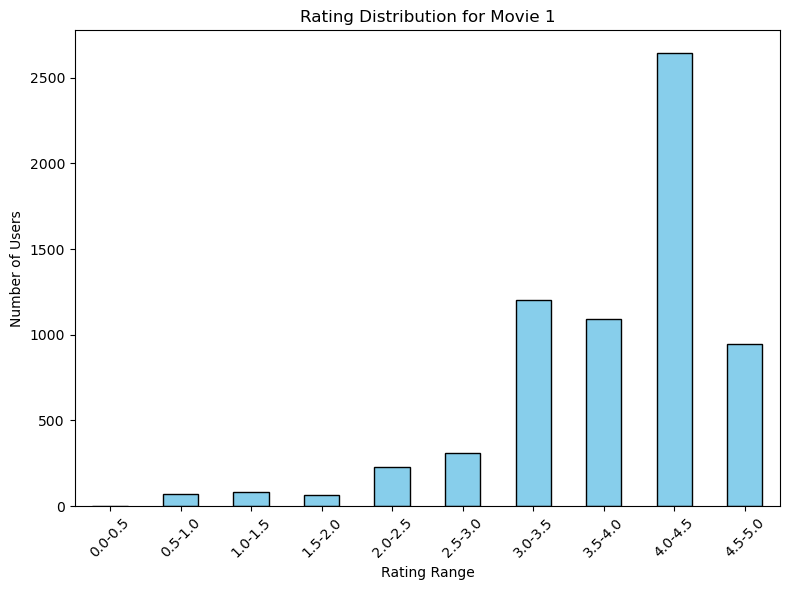

In [249]:
# 将评分按每隔 0.5 的区间进行分组
rating_bins = [i * 0.5 for i in range(11)]  # 生成区间: [0, 0.5, 1.0, ..., 5.0]
rating_labels = [f'{i*0.5}-{(i+1)*0.5}' for i in range(10)]  # 创建 10 个标签：'0.0-0.5', '0.5-1.0', ...

# 使用 pd.cut 将评分数据分组
rating_groups = pd.cut(movie_id_first.dropna(), bins=rating_bins, labels=rating_labels, right=False)

# 计算每个评分区间的数量
rating_counts = rating_groups.value_counts().sort_index()

# 绘制柱状图
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f"Rating Distribution for Movie {pivot_df.columns[0]}")
plt.xlabel('Rating Range')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 数据预处理

In [250]:
# 填充 NaN 值为该列的平均值
pivot_df_filled = pivot_df.fillna(pivot_df.mean())

# 计算每列的平均值
column_means = pivot_df.mean()

# 将每个值减去所在列的平均值
pivot_df_mean = pivot_df_filled - column_means

# 查看处理后的 DataFrame
print(pivot_df_mean)

movieId    1         2        3         4         5        6         7       \
userId                                                                        
3        0.171887  0.000000  0.00000  0.000000  0.000000  0.00000  0.000000   
12       0.171887 -1.059255 -0.84899  0.000000  0.000000  0.00000 -0.034759   
72       0.000000 -1.059255  0.00000  0.000000  0.000000  0.19601  0.965241   
80       0.000000 -2.059255  0.00000  0.000000  0.000000  1.19601  0.000000   
120      1.171887  0.000000  0.00000  0.000000  0.000000  0.00000  0.965241   
...           ...       ...      ...       ...       ...      ...       ...   
162484  -0.328113 -0.059255  0.00000  0.452229 -0.708668  0.00000  0.000000   
162495  -0.828113 -0.059255  0.65101  0.000000 -0.708668  0.00000  0.000000   
162508   0.671887  0.000000  0.00000  0.000000  0.000000 -0.80399  0.000000   
162516   0.671887 -0.559255 -2.34899 -0.547771  0.000000  0.69601 -1.034759   
162519   1.171887 -1.059255  0.00000  0.000000  0.00

In [251]:
from sklearn.decomposition import TruncatedSVD

# 选择你想保留的奇异值个数（例如：k=5）
k = 5

# 使用 TruncatedSVD 进行奇异值分解
svd = TruncatedSVD(n_components=k)
U = svd.fit_transform(pivot_df_mean)  # 左奇异矩阵 U
S = svd.singular_values_  # 奇异值
Vt = svd.components_  # 右奇异矩阵 V^T

# 查看分解结果
print("U (Left Singular Matrix):")
print(U)

print("\nSingular Values:")
print(S)

print("\nV^T (Right Singular Matrix):")
print(Vt)

shape = U.shape
print("矩阵的形状是:", shape)

shape = Vt.shape
print("矩阵的形状是:", shape)
i=0
vi = Vt[i, :].T
print(vi)

U (Left Singular Matrix):
[[  4.77020869  -1.37876783   4.74145347  -1.15292147  -1.56087065]
 [ -0.89324345   2.47246038   1.90183358   0.79085432   0.13341633]
 [  1.51433307   1.36298299  -0.79467602   2.21684646   2.74967515]
 ...
 [ -1.13614102 -11.87339241  -0.82733101   0.02825912   7.52499586]
 [  4.25417439  -6.9074709    1.33683403  -5.28743097   6.43434726]
 [  0.62292963   3.72054188   1.64374009  -2.32436056   1.52695785]]

Singular Values:
[677.58130254 377.22922399 325.47175341 256.08524872 249.06643528]

V^T (Right Singular Matrix):
[[ 0.05141387  0.04643755  0.02125296 ...  0.00385544  0.00445494
   0.00318868]
 [ 0.03098743 -0.03210674 -0.00990042 ... -0.00049806  0.00385495
  -0.00185392]
 [-0.00494684 -0.03194209 -0.03236231 ...  0.00770515  0.00958962
   0.00695155]
 [ 0.06641417  0.00917098  0.00143737 ...  0.00239671 -0.00024266
   0.00244144]
 [ 0.1029291   0.01377989 -0.00846558 ... -0.00094265  0.00527162
  -0.00122952]]
矩阵的形状是: (9663, 5)
矩阵的形状是: (5, 3790)
[0.

### 左奇异矩阵U

In [252]:
# 左奇异矩阵每一行对应的是一个userId
U_df = pd.DataFrame(U, index=pivot_df_mean.index)
U_df

,0,1,2,3,4
userId,,,,,
3,4.770209,-1.378768,4.741453,-1.152921,-1.560871
12,-0.893243,2.472460,1.901834,0.790854,0.133416
72,1.514333,1.362983,-0.794676,2.216846,2.749675
80,-6.105032,-0.973231,5.398510,-1.169727,-0.435668
120,10.866220,3.375063,-6.677290,1.072689,1.891389
...,...,...,...,...,...
162484,-5.076809,-2.103577,1.676939,-0.647179,-2.337450
162495,-4.446302,-6.272613,3.818774,-3.979100,0.058018
162508,-1.136141,-11.873392,-0.827331,0.028259,7.524996


In [263]:
# 找到 U_df 每一列中最大值对应的 userId
max_user_id = U_df.idxmax()

# 找到 U_df 每一列中最小值对应的 userId
min_user_id = U_df.idxmin()

# 输出每一列的最大值和最小值对应的 userId
print("Max userId for each component:")
print(max_user_id)

print("\nMin userId for each component:")
print(min_user_id)


        


Max userId for each component:
0    129440
1     96911
2     96265
3     18751
4     57548
dtype: int64

Min userId for each component:
0     57548
1    130333
2     50335
3     57548
4    106065
dtype: int64

u1
最高电影评分id:[50798, 3593, 8666, 737, 125916]

最高电影评分信息:

movieId                 737
title      Barb Wire (1996)
genres        Action|Sci-Fi
Name: 722, dtype: object

movieId                        3593
title      Battlefield Earth (2000)
genres                Action|Sci-Fi
Name: 3494, dtype: object

movieId                    8666
title           Catwoman (2004)
genres     Action|Crime|Fantasy
Name: 7953, dtype: object

movieId                50798
title      Epic Movie (2007)
genres      Adventure|Comedy
Name: 11351, dtype: object

movieId                         125916
title      Fifty Shades of Grey (2015)
genres                   Drama|Romance
Name: 26371, dtype: object


u2
最高电影评分id:[50798, 3593, 8666, 737, 125916]

最高电影评分信息:

movieId                 737
title      Barb Wir

### 以最大的奇异值为例

In [254]:
pivot_df_mean.loc[max_user_id[0]]-pivot_df_mean.loc[min_user_id[0]]

movieId
1         4.000000
2         2.000000
3         4.500000
4         2.047771
5         2.208668
            ...   
192389    0.000000
192803    0.000000
194448    0.000000
195159    0.000000
201773    0.000000
Length: 3790, dtype: float64

In [255]:
print(pivot_df_mean.loc[min_user_id[0]])

movieId
1        -2.828113
2        -0.059255
3        -2.348990
4        -2.047771
5        -2.208668
            ...   
192389    0.000000
192803    0.000000
194448    0.000000
195159    0.000000
201773    0.000000
Name: 57548, Length: 3790, dtype: float64


#右奇异向量任务：查看大值和小值

In [256]:
#正向关联： 列出与 vi 正相关最大的 5 部电影，它们可能具有相似的属性或受相同用户群欢迎
# 遍历每个右奇异向量
for i in range(5):  # Vt有5行
    # 选择第i个右奇异向量
    vi = Vt[i, :].T

    # 创建一个 DataFrame，以电影名作为行标签，Score作为列标签，vi作为值填入
    movie_scores = pd.DataFrame(vi, index=filtered_movies, columns=['Score'])


    # 根据 Score 进行正向排序，
    sorted_movie_scores = movie_scores.sort_values(by='Score', ascending=True)

    # 选择排序后得分最高的5个
    top_5_movies = sorted_movie_scores.head(5)
    # 输出结果
    print(f"\n与 v{i+1} 负相关最大的5部电影:")
    print(top_5_movies)



与 v1 负相关最大的5部电影:
                                                       Score
(2920, Children of Paradise (Les enfants du par...  0.001208
(452, Widows' Peak (1994), Drama)                   0.001301
(2069, Trip to Bountiful, The (1985), Drama)        0.001304
(4970, Blue Angel, The (Blaue Engel, Der) (1930...  0.001369
(3077, 42 Up (1998), Documentary)                   0.001380

与 v2 负相关最大的5部电影:
                                                       Score
(1917, Armageddon (1998), Action|Romance|Sci-Fi... -0.076838
(780, Independence Day (a.k.a. ID4) (1996), Act... -0.064847
(4310, Pearl Harbor (2001), Action|Drama|Romanc... -0.061325
(4270, Mummy Returns, The (2001), Action|Advent... -0.057593
(2701, Wild Wild West (1999), Action|Comedy|Sci... -0.055543

与 v3 负相关最大的5部电影:
                                                       Score
(587, Ghost (1990), Comedy|Drama|Fantasy|Romanc... -0.059670
(597, Pretty Woman (1990), Comedy|Romance)         -0.057029
(1101, Top Gun (1986), Action|R

In [257]:
#负向关联： 列出与 vi 负相关最大的 5 部电影，可能代表与主流趋势对立的观影偏好。
# 遍历每个右奇异向量
for i in range(5):  # Vt有5行
    # 选择第i个右奇异向量
    vi = Vt[i, :].T

    # 创建一个 DataFrame，以电影名作为行标签，Score作为列标签，vi作为值填入
    movie_scores = pd.DataFrame(vi, index=filtered_movies, columns=['Score'])


    # 根据 Score 进行正向排序，
    sorted_movie_scores = movie_scores.sort_values(by='Score', ascending=False)

    # 选择排序后得分最高的5个
    top_5_movies = sorted_movie_scores.head(5)
    # 输出结果
    print(f"\n与 v{i+1} 正相关最大的5部电影:")
    print(top_5_movies)



与 v1 正相关最大的5部电影:
                                                       Score
(780, Independence Day (a.k.a. ID4) (1996), Act...  0.063271
(2628, Star Wars: Episode I - The Phantom Menac...  0.059549
(4306, Shrek (2001), Adventure|Animation|Childr...  0.057498
(1580, Men in Black (a.k.a. MIB) (1997), Action...  0.056814
(367, Mask, The (1994), Action|Comedy|Crime|Fan...  0.055130

与 v2 正相关最大的5部电影:
                                                       Score
(1206, Clockwork Orange, A (1971), Crime|Drama|...  0.089672
(924, 2001: A Space Odyssey (1968), Adventure|D...  0.089115
(608, Fargo (1996), Comedy|Crime|Drama|Thriller)    0.083542
(296, Pulp Fiction (1994), Comedy|Crime|Drama|T...  0.080616
(111, Taxi Driver (1976), Crime|Drama|Thriller)     0.076587

与 v3 正相关最大的5部电影:
                                                       Score
(89745, Avengers, The (2012), Action|Adventure|...  0.062450
(53996, Transformers (2007), Action|Sci-Fi|Thri...  0.061610
(72998, Avatar (2009), Action|A

#左奇异向量任务：查看大值和小值

In [264]:
#正向关联用户： 查看最高分量用户的评分偏好，列出其前 5 部评分较高和后 5 部评分较低的电影。
for i in range (5):
    #  找到每个ui最高分量用户的索引
    max_user_index = max_user_id.values[i] 
    
    print(f"\nu{i+1}的最高分量用户索引是{max_user_index}")

    #  获取该用户的评分
    max_user_ratings = pivot_df_mean.loc[max_user_index]

    #  获取前5部评分最高的电影
    top_5_movies = max_user_ratings.nlargest(5)

    #  从 filtered_movies 中获取对应 movieId 的电影信息
    top_movie_ids = top_5_movies.index.tolist()
    print(f"最高电影评分id:{top_movie_ids}\r\n")

    #  从 filtered_movies 中筛选出这些电影
    filtered_top_movies = filtered_movies[filtered_movies['movieId'].isin(top_movie_ids)]

    #  打印每部电影的信息
    print(f"最高电影评分信息:\r\n")
    for index, row in filtered_top_movies.iterrows():
        print(f"{row}\r\n")
    #  获取前5部评分最低的电影
    bottom_5_movies = max_user_ratings.nsmallest(5)
    #  从 filtered_movies 中获取对应 movieId 的电影信息
    bottom_movie_ids = bottom_5_movies.index.tolist()
    print(f"最低电影评分id:{bottom_movie_ids}\r\n")

    #  从 filtered_movies 中筛选出这些电影
    filtered_bottom_movies = filtered_movies[filtered_movies['movieId'].isin(bottom_movie_ids)]

    print(f"最低电影评分信息:\r\n")
    for index, row in filtered_bottom_movies.iterrows():
        print(f"{row}\r\n")
        


u1的最高分量用户索引是129440
最高电影评分id:[50798, 3593, 8666, 737, 125916]

最高电影评分信息:

movieId                 737
title      Barb Wire (1996)
genres        Action|Sci-Fi
Name: 722, dtype: object

movieId                        3593
title      Battlefield Earth (2000)
genres                Action|Sci-Fi
Name: 3494, dtype: object

movieId                    8666
title           Catwoman (2004)
genres     Action|Crime|Fantasy
Name: 7953, dtype: object

movieId                50798
title      Epic Movie (2007)
genres      Adventure|Comedy
Name: 11351, dtype: object

movieId                         125916
title      Fifty Shades of Grey (2015)
genres                   Drama|Romance
Name: 26371, dtype: object

最低电影评分id:[55814, 5060, 37380, 90647, 78209]

最低电影评分信息:

movieId                            5060
title      M*A*S*H (a.k.a. MASH) (1970)
genres                 Comedy|Drama|War
Name: 4954, dtype: object

movieId                   37380
title               Doom (2005)
genres     Action|Horror|Sci-Fi

In [265]:
#负向关联用户： 同样列出最低分量用户的评分偏好，关注他们对电影的评分趋势是否表现出与主流趋势的对立。
for i in range (5):
    #  找到每个ui最低分量用户的索引
    min_user_index = min_user_id.values[i] 
    
    print(f"\nu{i+1}的最高分量用户索引是{min_user_index}")

    #  获取该用户的评分
    min_user_ratings = pivot_df_mean.loc[min_user_index]

    #  获取前5部评分最高的电影
    top_5_movies = min_user_ratings.nlargest(5)

    #  从 filtered_movies 中获取对应 movieId 的电影信息
    top_movie_ids = top_5_movies.index.tolist()
    print(f"最高电影评分id:{top_movie_ids}\r\n")

    #  从 filtered_movies 中筛选出这些电影
    filtered_top_movies = filtered_movies[filtered_movies['movieId'].isin(top_movie_ids)]

    #  打印每部电影的信息
    print(f"最高电影评分信息:\r\n")
    for index, row in filtered_top_movies.iterrows():
        print(f"{row}\r\n")
    #  获取前5部评分最低的电影
    bottom_5_movies = min_user_ratings.nsmallest(5)
    #  从 filtered_movies 中获取对应 movieId 的电影信息
    bottom_movie_ids = bottom_5_movies.index.tolist()
    print(f"最低电影评分id:{bottom_movie_ids}\r\n")

    #  从 filtered_movies 中筛选出这些电影
    filtered_bottom_movies = filtered_movies[filtered_movies['movieId'].isin(bottom_movie_ids)]

    print(f"最低电影评分信息:\r\n")
    for index, row in filtered_bottom_movies.iterrows():
        print(f"{row}\r\n")
        


u1的最高分量用户索引是57548
最高电影评分id:[193, 5128, 177, 2520, 2524]

最高电影评分信息:

movieId                         177
title      Lord of Illusions (1995)
genres                       Horror
Name: 175, dtype: object

movieId                 193
title      Showgirls (1995)
genres                Drama
Name: 191, dtype: object

movieId              2520
title      Airport (1970)
genres              Drama
Name: 2429, dtype: object

movieId                               2524
title         Towering Inferno, The (1974)
genres     Action|Adventure|Drama|Thriller
Name: 2433, dtype: object

movieId                          5128
title      Queen of the Damned (2002)
genres                 Fantasy|Horror
Name: 5022, dtype: object

最低电影评分id:[171011, 159817, 170705, 1221, 904]

最低电影评分信息:

movieId                   904
title      Rear Window (1954)
genres       Mystery|Thriller
Name: 883, dtype: object

movieId                              1221
title      Godfather: Part II, The (1974)
genres                      

# 使用 SVD 进行推荐

In [266]:
#预测缺失值
from sklearn.preprocessing import MinMaxScaler

# 创建重建矩阵，预测缺失值Rk=UkSkVtk
Rk = np.dot(np.dot(U, np.diag(S)), Vt)
#这里的np.dot是矩阵乘法，np.diag输入是一个二维数组（矩阵），会提取该矩阵的主对角线元素，并返回一个一维数组。

# 使用 MinMaxScaler 将 Rk 的值标准化到 0 到 5 之间
scaler = MinMaxScaler(feature_range=(0, 5))
Rk_scaled = scaler.fit_transform(Rk)
#这里创建了一个 MinMaxScaler 实例，并将特征范围设置为从 0 到 5。scaler.fit_transform(Rk) 是将 Rk 矩阵的值标准化到指定的范围。
# fit 方法计算所需的缩放参数，而 transform 方法应用这些参数并返回标准化后的矩阵。

# 创建一个 DataFrame，pivot_df.index作为横轴标签，pivot_df.columns作为纵轴标签，Rk_scal，Rk_scaleded作为值填入
SVD_df = pd.DataFrame(Rk_scaled, index=pivot_df.index, columns=pivot_df.columns)

# 输出电影评分矩阵
SVD_df

movieId,1,2,3,4,5,6,7,8,9,10,...,188301,189203,189333,189713,192385,192389,192803,194448,195159,201773
userId,,,,,,,,,,,,,,,,,,,,,
3,3.624391,3.118675,3.250581,3.723289,3.313833,3.787910,3.527211,3.513851,3.205487,3.095928,...,3.493138,3.662472,3.538486,4.106088,3.960751,3.333537,3.485415,3.663132,3.870686,3.551677
12,3.522635,2.889596,3.079827,3.635616,3.165715,3.631943,3.421721,3.346445,2.985135,2.862868,...,3.195300,3.404182,3.268239,3.960615,3.793319,2.990433,3.214888,3.406609,3.629377,3.266615
72,3.760642,3.050066,3.234066,3.721956,3.337879,3.688155,3.574707,3.411957,3.070724,3.043014,...,3.210960,3.373327,3.289893,3.920964,3.793805,2.970557,3.249807,3.406569,3.637102,3.266162
80,3.129115,2.685014,2.835582,3.411815,2.913648,3.356649,3.154432,3.202424,2.832156,2.600298,...,3.159167,3.357094,3.190851,3.839273,3.659761,3.026218,3.155291,3.344741,3.491174,3.239142
120,4.214055,3.453135,3.706285,4.079798,3.762899,4.160517,3.982774,3.701178,3.482728,3.549605,...,3.289368,3.514051,3.443888,4.070019,3.948504,3.026742,3.360510,3.509901,3.792284,3.335658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162484,3.113014,2.783404,2.990330,3.564320,3.061622,3.350219,3.296553,3.330509,2.992284,2.672924,...,3.082422,3.323645,3.137286,3.806275,3.612872,2.988498,3.118124,3.278189,3.323486,3.177060
162495,3.076614,2.843431,2.979950,3.432321,3.022865,3.347403,3.205344,3.281193,3.016924,2.762616,...,3.191410,3.379393,3.221742,3.733932,3.575955,3.130277,3.194352,3.339186,3.401188,3.264092
162508,3.529437,3.159691,3.235889,3.524623,3.345240,3.289618,3.466965,3.368554,3.122915,3.080350,...,3.245132,3.264531,3.250574,3.554665,3.513025,3.114506,3.285635,3.324562,3.360223,3.274796


In [ ]:
#实现推荐系统
# 逐个用户进行推荐
for user_id in user_500:  # 遍历 user_500 列表中的每个用户 ID

    # 获取用户未评分的电影
    unrated_movies = pivot_df.columns[pivot_df.loc[user_id].isna()]

    # 提取这些电影的重建值
    reconstructed_values = SVD_df.loc[user_id, unrated_movies]

    # 根据重建值排序，推荐重建值最高的电影
    recommended_movies = reconstructed_values.sort_values(ascending=False)

    # 输出推荐的电影
    print("推荐给用户 {} 的电影列表：".format(user_id))
    print(recommended_movies)
